<a href="https://colab.research.google.com/github/Kornelkaaaa/Prediction-of-The-Most-Popular-Song-2024/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Machine Learning Models
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

# Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Korenlia Buszka
#Import data
from google.colab import drive

import pandas as pd
file_path = '/content/drive/MyDrive/DS_3_Buszka_Kornelia/Most Streamed Spotify Songs 2024.csv'
data = pd.read_csv(file_path, encoding='latin1')
data_head = data.head()

data_head

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [ ]:
#Cheack for NA data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [ ]:
#As we see we do not have data in TIDAL Popilarity column so we can delate it
data = data.drop(columns=['TIDAL Popularity'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [ ]:
# Convert more column form object to float64 type
columns_to_convert = ['All Time Rank','Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts' ]
data[columns_to_convert] = data[columns_to_convert].astype(str).apply(lambda x: x.str.replace(',', '', regex=True).astype(float))


In [ ]:
data= data.dropna()

In [ ]:
# Cheacking colums type
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 4590
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       565 non-null    object 
 1   Album Name                  565 non-null    object 
 2   Artist                      565 non-null    object 
 3   Release Date                565 non-null    object 
 4   ISRC                        565 non-null    object 
 5   All Time Rank               565 non-null    float64
 6   Track Score                 565 non-null    float64
 7   Spotify Streams             565 non-null    float64
 8   Spotify Playlist Count      565 non-null    float64
 9   Spotify Playlist Reach      565 non-null    float64
 10  Spotify Popularity          565 non-null    float64
 11  YouTube Views               565 non-null    float64
 12  YouTube Likes               565 non-null    float64
 13  TikTok Posts                565 non-nul

In [ ]:
data.describe()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
count,565.000000,565.000000,5.650000e+02,565.000000,5.650000e+02,565.000000,5.650000e+02,5.650000e+02,5.650000e+02,5.650000e+02,...,5.650000e+02,565.000000,565.000000,5.650000e+02,565.000000,5.650000e+02,5.650000e+02,5.650000e+02,5.650000e+02,565.000000
mean,1633.005310,61.544425,7.020837e+08,106860.853097,3.980586e+07,69.722124,4.482480e+08,3.561796e+06,7.506962e+05,1.111738e+08,...,1.016212e+05,321.111504,42.557522,1.775387e+06,35.398230,1.294814e+08,1.219987e+05,1.665050e+07,4.133813e+06,0.405310
std,1276.589356,65.000014,5.832906e+08,81430.415416,3.781204e+07,11.175532,6.877430e+08,4.905404e+06,1.659186e+06,1.876729e+08,...,1.694869e+05,720.146899,59.133480,5.014151e+06,32.222118,1.886791e+08,3.025576e+05,3.193500e+07,5.039221e+06,0.491387
min,1.000000,19.500000,1.029272e+07,1665.000000,1.619073e+06,6.000000,1.271445e+06,2.198400e+04,8.000000e+01,4.912000e+03,...,1.000000e+00,1.000000,1.000000,7.100000e+01,1.000000,2.191000e+03,3.600000e+01,3.080000e+02,2.614500e+04,0.000000
25%,488.000000,28.100000,2.535410e+08,44672.000000,1.437124e+07,65.000000,8.406619e+07,7.688130e+05,5.646000e+04,1.375761e+07,...,6.091000e+03,33.000000,9.000000,8.911300e+04,13.000000,9.776641e+06,6.060000e+03,1.352255e+06,9.825550e+05,0.000000
50%,1333.000000,40.700000,5.487243e+08,84469.000000,2.806696e+07,71.000000,2.157441e+08,2.050299e+06,2.154330e+05,4.450216e+07,...,3.841800e+04,107.000000,26.000000,3.479970e+05,27.000000,5.096488e+07,2.522600e+04,5.221070e+06,2.325531e+06,0.000000
75%,2542.000000,69.700000,9.757547e+08,156671.000000,5.394730e+07,76.000000,5.307789e+08,4.492100e+06,7.317970e+05,1.288503e+08,...,1.259600e+05,290.000000,54.000000,1.067030e+06,45.000000,1.755963e+08,9.476700e+04,1.672419e+07,5.206645e+06,1.000000
max,4558.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,95.000000,8.013997e+09,4.577089e+07,1.889472e+07,2.193689e+09,...,1.695240e+06,7064.000000,584.000000,4.267518e+07,188.000000,1.097431e+09,3.556791e+06,2.574594e+08,4.484264e+07,1.000000


In [ ]:
#sns.pairplot(data)
#plt.show()

#Prediction of number of views under song at TikTok.
Using pipeline

In [ ]:
# Define the relevant columns
columns_to_predict = ['All Time Rank', 'Track Score', 'TikTok Views', 'Spotify Playlist Count',
                      'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
                      'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'YouTube Playlist Reach',
                      'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
                      'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count',
                      'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams',
                      'Shazam Counts']
target_column = 'Spotify Streams'

# Define features (X) and target (y)
X = data[columns_to_predict]
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use pipeline to streamline scaling and model fitting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train the pipeline (scaling + linear regression model)
pipeline.fit(X_train, y_train)

# Make predictions using the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2_train = pipeline.score(X_train, y_train)
r2_test = pipeline.score(X_test, y_test)
print(f"R² on training data: {r2_train}")
print(f"R² on testing data: {r2_test}")

mse_train = mean_squared_error(y_train, pipeline.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f"MSE on training data: {mse_train}")
print(f"MSE on testing data: {mse_test}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print({"R² Score": r2_test, "RMSE": rmse})

# Predict the most Spotify streams
most_spotify_streams = pipeline.predict([[
    max(data['All Time Rank']),
    max(data['Track Score']),
    max(data['TikTok Views']),
    max(data['Spotify Playlist Count']),
    max(data['Spotify Playlist Reach']),
    max(data['Spotify Popularity']),
    max(data['YouTube Views']),
    max(data['YouTube Likes']),
    max(data['TikTok Posts']),
    max(data['TikTok Likes']),
    max(data['YouTube Playlist Reach']),
    max(data['Apple Music Playlist Count']),
    max(data['AirPlay Spins']),
    max(data['SiriusXM Spins']),
    max(data['Deezer Playlist Count']),
    max(data['Deezer Playlist Reach']),
    max(data['Amazon Playlist Count']),
    max(data['Pandora Streams']),
    max(data['Pandora Track Stations']),
    max(data['Soundcloud Streams']),
    max(data['Shazam Counts'])
]])
print(f"Predicted Most Spotify Streams: {most_spotify_streams[0]}")

R² on training data: 0.8806788272065265
R² on testing data: 0.8325800477862317
MSE on training data: 3.971944639779862e+16
MSE on testing data: 6.0698972804066264e+16
{'R² Score': 0.8325800477862317, 'RMSE': 246371615.2564379}
Predicted Most Spotify Streams: 5213355549.200746


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


R² is higher; that's better. Our R² is very close to 1 (it is 0.88), so the model fits the data well.

Our RMSE is hug! (approximately 246,371,615) Lower RMSE value is better, because gives us a sense of how much error to expect in your predictions. Let's work with this.

In [ ]:
# Calculate the absolute difference between the predicted value and actual values
data['Difference'] = abs(data['Spotify Streams'] - most_spotify_streams[0])

# Find the row with the smallest difference
closest_match = data.loc[data['Difference'].idxmin()]

# Display the closest match
print("Closest Song with Similar Spotify Streams:")
print(closest_match)


Closest Song with Similar Spotify Streams:
Track                          Blinding Lights
Album Name                     Blinding Lights
Artist                              The Weeknd
Release Date                        11/29/2019
ISRC                              USUG11904206
All Time Rank                             56.0
Track Score                              194.0
Spotify Streams                   4281468720.0
Spotify Playlist Count                590392.0
Spotify Playlist Reach             165544011.0
Spotify Popularity                        83.0
YouTube Views                      833807130.0
YouTube Likes                       10093211.0
TikTok Posts                         2882064.0
TikTok Likes                       337322563.0
TikTok Views                      3501177394.0
YouTube Playlist Reach            2258085924.0
Apple Music Playlist Count               859.0
AirPlay Spins                        1695240.0
SiriusXM Spins                          1116.0
Deezer Playlist C

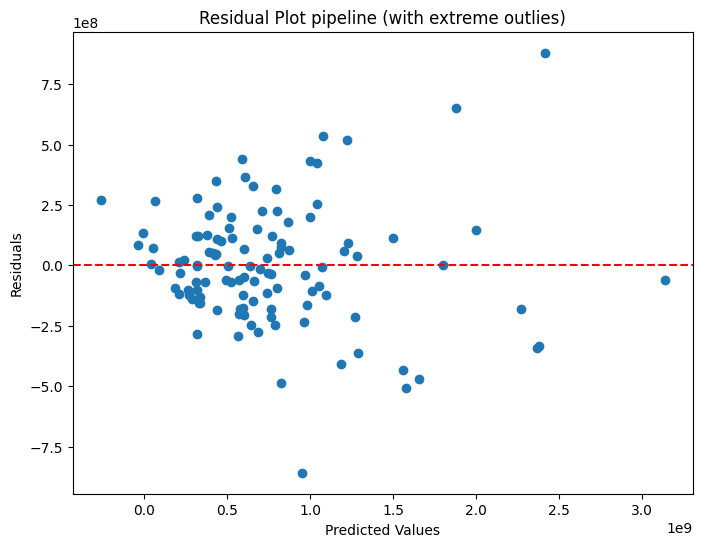

In [ ]:
# Residual analysis to check model fit
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot pipeline (with extreme outlies)')
plt.show()


The residual plot shows that the model is consistently predicting lower values than it should, especially for the bigger numbers. This means the model is not fully understanding the patterns in the data, which is why it's making such errors.








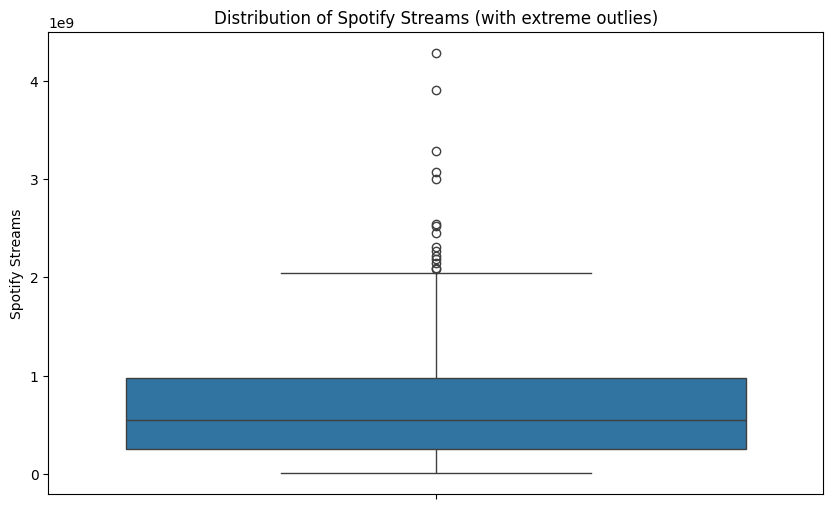

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['Spotify Streams'])
plt.title('Distribution of Spotify Streams (with extreme outlies)')
plt.show()


The disctribution of TikTok views has several extreme outliers. May affecting model's performance by causing the high MAE.
For future:
- Removing Outliers
- Logaritm transformation


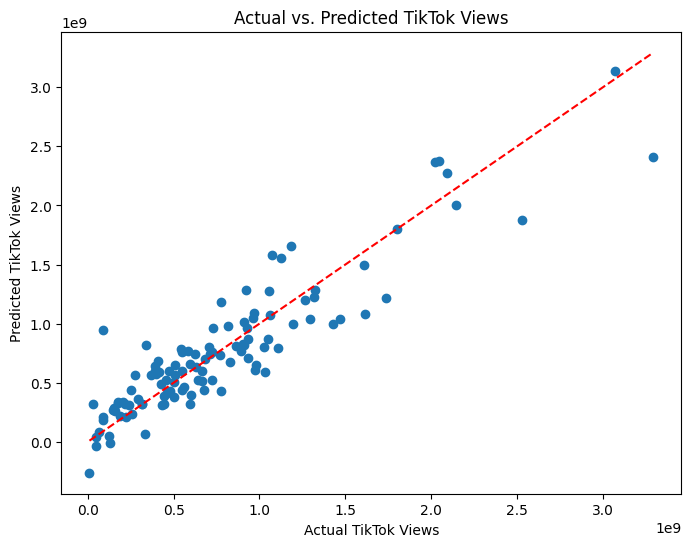

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual TikTok Views')
plt.ylabel('Predicted TikTok Views')
plt.title('Actual vs. Predicted TikTok Views')
plt.show()


We can see there:
1. Extreme Outlier
2. Clustering at Lower Values
3. A Little Deviation from the Line of Perfect Prediction



In [ ]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Set a threshold for high VIF
vif_threshold = 10

# Copy columns_to_predict to a working list
columns_to_predict_working = columns_to_predict.copy()

# Iteratively drop features with the highest VIF
while True:
    # Calculate VIFs
    vif_data = calculate_vif(X)
    print(vif_data)

    # Check if any VIF is above the threshold
    max_vif = vif_data['VIF'].max()
    if max_vif > vif_threshold:
        # Identify the feature with the highest VIF
        feature_to_drop = vif_data.loc[vif_data['VIF'] == max_vif, 'Feature'].values[0]
        print(f"Dropping feature: {feature_to_drop} (VIF={max_vif})")

        # Drop the feature from the dataset
        X = X.drop(columns=[feature_to_drop])

        # Remove the feature from columns_to_predict_working
        columns_to_predict_working.remove(feature_to_drop)
    else:
        # Exit the loop if all VIFs are below the threshold
        break

print("Final set of features with acceptable VIFs:")
print(columns_to_predict_working)


                       Feature        VIF
0                All Time Rank   3.786191
1                  Track Score   5.655449
2                 TikTok Views  18.501104
3       Spotify Playlist Count   9.273642
4       Spotify Playlist Reach   8.379705
5           Spotify Popularity  11.440255
6                YouTube Views  11.066846
7                YouTube Likes  11.332060
8                 TikTok Posts   2.752677
9                 TikTok Likes  17.412764
10      YouTube Playlist Reach   2.168874
11  Apple Music Playlist Count  10.928185
12               AirPlay Spins   3.337044
13              SiriusXM Spins   1.710109
14       Deezer Playlist Count   6.437965
15       Deezer Playlist Reach   2.891334
16       Amazon Playlist Count   8.190546
17             Pandora Streams   3.718192
18      Pandora Track Stations   2.392102
19          Soundcloud Streams   1.891173
20               Shazam Counts   4.570723
Dropping feature: TikTok Views (VIF=18.501103586103916)
                    

Just few correlation. Problem if: VIF > 5-10 • Higher VIF = More multicollinearity. Work about that.

# **Let's try remove some extreme outliers using the 95th percentile approach**
(Using pipeline to streamline scaling and model fitting)

In [ ]:
# Define the relevant columns
#columns_to_predict = ['All Time Rank', 'Track Score', 'TikTok Views', 'Spotify Playlist Count',
                     # 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
                      #'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'YouTube Playlist Reach',
                      #'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
                      #'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count',
                      #'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams',
                      #'Shazam Counts']
#target_column = 'Spotify Streams'

q9 = data[target_column].quantile(0.95)
data_clear = data[data[target_column] <= q9].copy()

# Define features (X) and target (y)
X = data_clear[columns_to_predict_working]
y = data_clear[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use pipeline to streamline scaling and model fitting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train the pipeline (scaling + linear regression model)
pipeline.fit(X_train, y_train)

# Make predictions using the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2_train = pipeline.score(X_train, y_train)
r2_test = pipeline.score(X_test, y_test)
print(f"R² on training data: {r2_train}")
print(f"R² on testing data: {r2_test}")

mse_train = mean_squared_error(y_train, pipeline.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f"MSE on training data: {mse_train}")
print(f"MSE on testing data: {mse_test}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print({"R² Score": r2_test, "RMSE": rmse})

# Calculate max values for the final features
input_features = [max(data[feature]) for feature in X]

# Predict the most Spotify streams using the trained pipeline
most_spotify_streams = pipeline.predict([input_features])

# Output the prediction
print(f"Predicted Most Spotify Streams: {most_spotify_streams[0]}")


R² on training data: 0.8129380545547018
R² on testing data: 0.7028929721288767
MSE on training data: 3.607930405793513e+16
MSE on testing data: 5.0358030892443864e+16
{'R² Score': 0.7028929721288767, 'RMSE': 224405951.1074603}
Predicted Most Spotify Streams: 4384689001.360335


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


RMSE is smaller (224,405,951)

In [ ]:
# Calculate the absolute difference between the predicted value and actual values in the filtered dataset
data_clear['Difference'] = abs(data_clear['Spotify Streams'] - most_spotify_streams[0])

# Find the row with the smallest difference
closest_match = data_clear.loc[data_clear['Difference'].idxmin()]

# Display the closest match
print("Closest Song with Similar Spotify Streams:")
print(closest_match)


Closest Song with Similar Spotify Streams:
Track                            Call Out My Name
Album Name                    My Dear Melancholy,
Artist                                 The Weeknd
Release Date                            3/29/2018
ISRC                                 USUG11800560
All Time Rank                               603.0
Track Score                                  61.6
Spotify Streams                      1780889877.0
Spotify Playlist Count                   229909.0
Spotify Playlist Reach                 75001452.0
Spotify Popularity                           79.0
YouTube Views                        1366385062.0
YouTube Likes                          10766000.0
TikTok Posts                             284554.0
TikTok Likes                           89244170.0
TikTok Views                          742902070.0
YouTube Playlist Reach                288311308.0
Apple Music Playlist Count                  121.0
AirPlay Spins                              3403.0
SiriusX

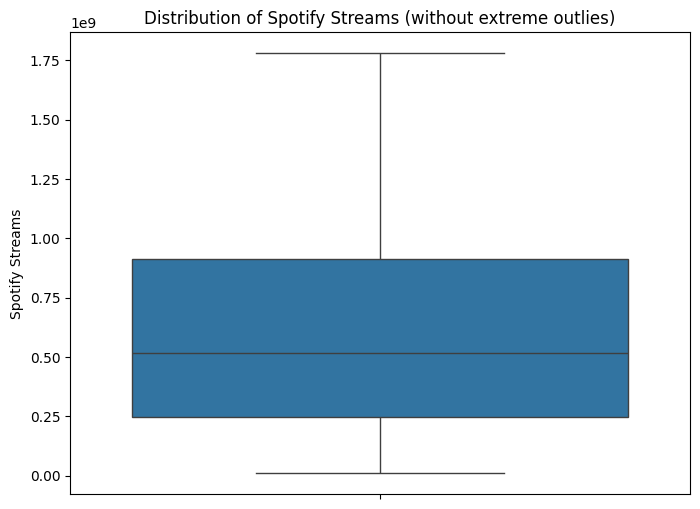

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data_clear[target_column])
plt.title('Distribution of Spotify Streams (without extreme outlies)')
plt.show()

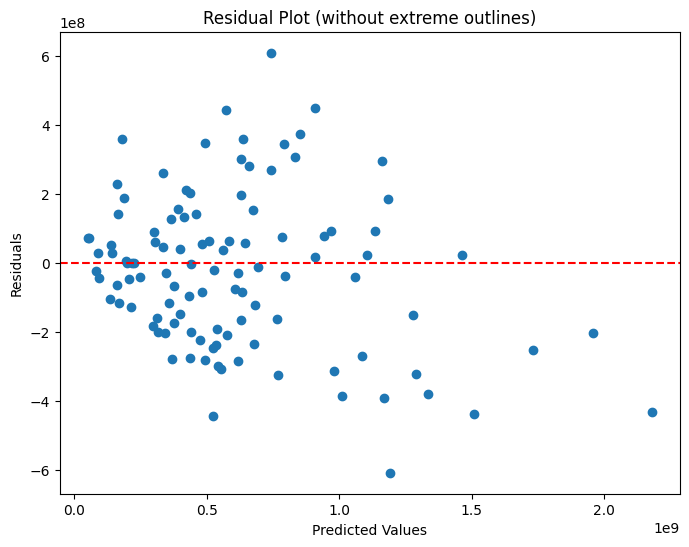

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (without extreme outlines)')
plt.show()


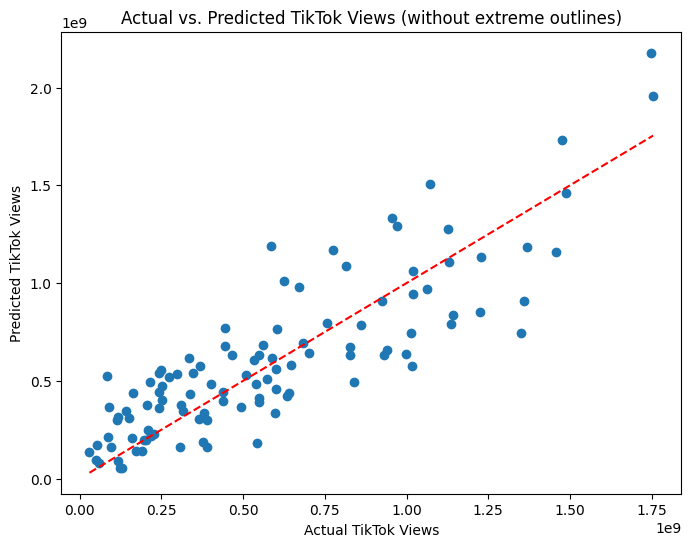

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual TikTok Views')
plt.ylabel('Predicted TikTok Views')
plt.title('Actual vs. Predicted TikTok Views (without extreme outlines)')
plt.show()





Let's try Random Forest method

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


{'Random Forest R² Score': 0.8258041148264935, 'Random Forest RMSE': 171829154.65193483}
Predicted Most Spotify Streams: 1448884760.3


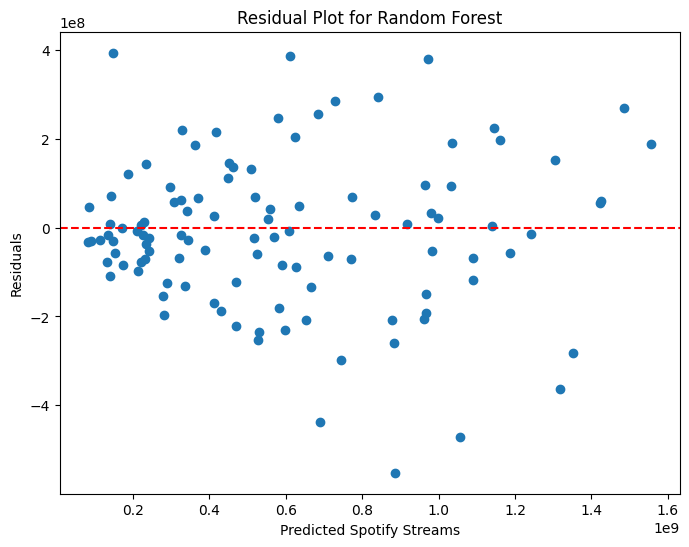

In [ ]:
# Define features (X) and target (y)
X = data_clear[columns_to_predict_working]
y = data_clear[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor using default parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Print Results for Random Forest Regressor
print({"Random Forest R² Score": r2_rf, "Random Forest RMSE": rmse_rf})

# Predict the most Spotify streams using the maximum values of the features
input_features = [max(data_clear[feature]) for feature in columns_to_predict_working]
most_spotify_streams = rf_model.predict([input_features])

# Output the prediction
print(f"Predicted Most Spotify Streams: {most_spotify_streams[0]}")

# Residual Analysis
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Spotify Streams')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.show()

In [ ]:
# Predict the most Spotify streams using the maximum values of the features
input_features = [max(data_clear[feature]) for feature in columns_to_predict_working]
most_spotify_streams = rf_model.predict([input_features])

# Output the prediction
print(f"Predicted Most Spotify Streams: {most_spotify_streams[0]}")

# Find the closest match in the dataset
data_clear['Difference'] = abs(data_clear['Spotify Streams'] - most_spotify_streams[0])
closest_match = data_clear.loc[data_clear['Difference'].idxmin()]

# Display the closest match
print("Closest Song with Similar Spotify Streams:")
print(closest_match)

Predicted Most Spotify Streams: 1448884760.3
Closest Song with Similar Spotify Streams:
Track                         In The Name Of Love
Album Name                             Pacha 2017
Artist                              Martin Garrix
Release Date                           10/23/2015
ISRC                                 NLM5S1600003
All Time Rank                               637.0
Track Score                                  60.4
Spotify Streams                      1452194416.0
Spotify Playlist Count                   164935.0
Spotify Playlist Reach                 69180262.0
Spotify Popularity                           75.0
YouTube Views                        1487688794.0
YouTube Likes                          13819002.0
TikTok Posts                            3910130.0
TikTok Likes                          133502443.0
TikTok Views                         1030123230.0
YouTube Playlist Reach                362287135.0
Apple Music Playlist Count                  154.0
AirPlay Spin

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the ElasticNetCV model
elasticnet_cv = ElasticNetCV()
elasticnet_cv.fit(X_train_scaled, y_train)

# Make predictions
y_pred_elastic = elasticnet_cv.predict(X_test_scaled)

# Evaluate the ElasticNetCV model
r2_elastic = r2_score(y_test, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)

# Print results for ElasticNetCV
print({"ElasticNet R² Score": r2_elastic, "ElasticNet RMSE": rmse_elastic})

# Display coefficients
print(f"ElasticNet Coefficients: {elasticnet_cv.coef_}")
print(f"Alpha (regularization strength): {elasticnet_cv.alpha_}")


{'ElasticNet R² Score': -0.01068777223956241, 'ElasticNet RMSE': 413891410.1879262}
ElasticNet Coefficients: [-172.49401058  204.14208941  577.19617364  441.18807876  709.07966869
  465.99962767  366.4874652   300.2375512   241.6949685   109.21699251
  555.04365805   39.11576712  299.02471254  581.76108993  998.95212496
  550.00728874  743.13057235]
Alpha (regularization strength): 835043.3830277352


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Predict the most Spotify streams using the maximum values of the features
input_features = [max(data_clear[feature]) for feature in columns_to_predict_working]
most_spotify_streams = elasticnet_cv.predict(scaler.transform([input_features]))

# Output the prediction
print(f"Predicted Most Spotify Streams: {most_spotify_streams[0]}")

# Find the closest match in the dataset
data_clear['Difference'] = abs(data_clear['Spotify Streams'] - most_spotify_streams[0])
closest_match = data_clear.loc[data_clear['Difference'].idxmin()]

# Display the closest match
print("Closest Song with Similar Spotify Streams:")
print(closest_match)

Predicted Most Spotify Streams: 623322981.0217829
Closest Song with Similar Spotify Streams:
Track                           Ocean Drive
Album Name                      Ocean Drive
Artist                          Duke Dumont
Release Date                      7/31/2015
ISRC                           GBUM71504503
All Time Rank                        4246.0
Track Score                            20.5
Spotify Streams                 624262344.0
Spotify Playlist Count             152117.0
Spotify Playlist Reach           23361260.0
Spotify Popularity                     68.0
YouTube Views                   139990813.0
YouTube Likes                      953527.0
TikTok Posts                        30003.0
TikTok Likes                      5605679.0
TikTok Views                     61873397.0
YouTube Playlist Reach              41851.0
Apple Music Playlist Count            180.0
AirPlay Spins                       56327.0
SiriusXM Spins                         34.0
Deezer Playlist Count      

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


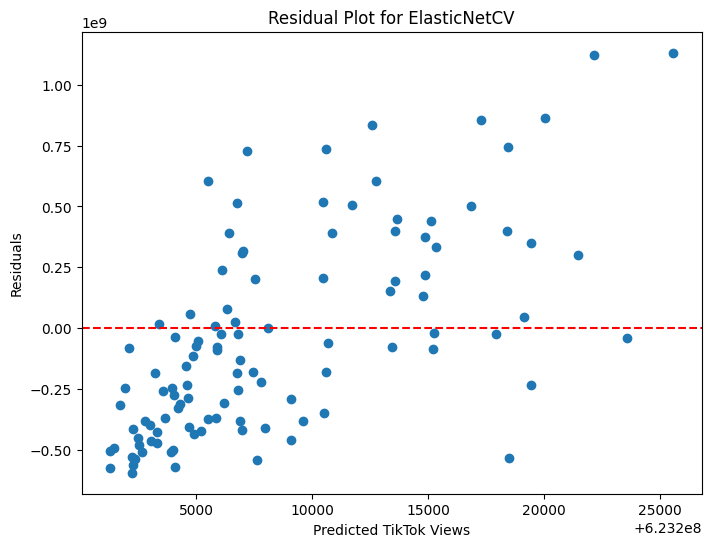

In [ ]:
# Residual Analysis
residuals = y_test - y_pred_elastic
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_elastic, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted TikTok Views')
plt.ylabel('Residuals')
plt.title('Residual Plot for ElasticNetCV')
plt.show()

Could be better

In [ ]:
# Log-transform the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Fit the model with log-transformed target variable
elasticnet_cv.fit(X_train_scaled, y_train_log)

# Make predictions and transform them back to original scale
y_pred_log = elasticnet_cv.predict(X_test_scaled)
y_pred_elastic_log = np.expm1(y_pred_log)

# Evaluate the ElasticNetCV model
r2_elastic = r2_score(y_test, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)

print({"ElasticNet R² Score": r2_elastic, "ElasticNet RMSE": rmse_elastic})

{'ElasticNet R² Score': -0.01068777223956241, 'ElasticNet RMSE': 413891410.1879262}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


With log transformation R² is a litte better, but our RMSE is way worse.

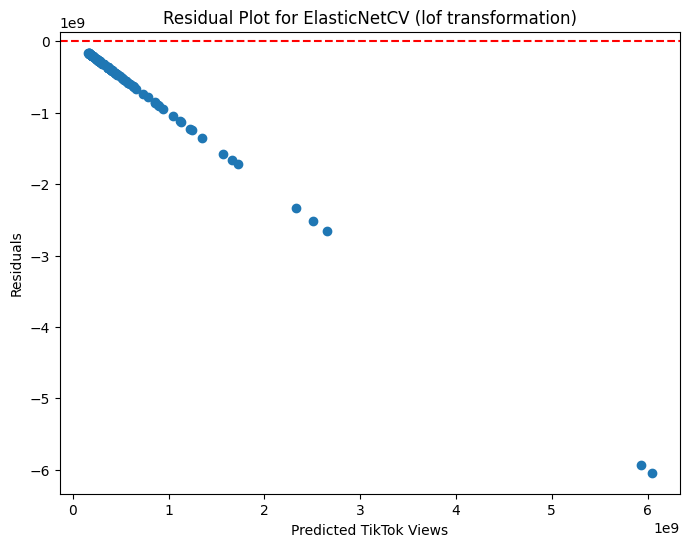

In [ ]:
residuals_log = y_test_log - y_pred_elastic_log
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_elastic_log, residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted TikTok Views')
plt.ylabel('Residuals')
plt.title('Residual Plot for ElasticNetCV (lof transformation)')
plt.show()

In [ ]:
# wow and not optimum method for my database

columns_to_predict = ['All Time Rank', 'Track Score', 'TikTok Views', 'Spotify Playlist Count',
                      'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
                      'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'YouTube Playlist Reach',
                      'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
                      'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count',
                      'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams',
                      'Shazam Counts']
target_column = 'Spotify Streams'

X = data[columns_to_predict]
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Hyperparameter Tuning for ElasticNetCV
elasticnet_cv = ElasticNetCV(
    alphas=np.logspace(-4, 4, 100),
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0],
    cv=5,
    random_state=42
)
elasticnet_cv.fit(X_train_scaled, y_train)

y_pred_elastic = elasticnet_cv.predict(X_test_scaled)
r2_elastic = r2_score(y_test, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)

print({"ElasticNet R² Score": r2_elastic, "ElasticNet RMSE": rmse_elastic})
print(f"ElasticNet Coefficients: {elasticnet_cv.coef_}")
print(f"Alpha (regularization strength): {elasticnet_cv.alpha_}")




{'ElasticNet R² Score': 0.835486121529495, 'ElasticNet RMSE': 244223996.94156775}
ElasticNet Coefficients: [-1.98804775e+07 -5.45342381e+07 -7.55374067e+07  3.71031349e+08
  9.04871514e+07  5.90981874e+07  3.77511542e+07  7.63749949e+07
  3.88143758e+07  7.54324504e+07  4.60943446e+06  6.95969633e+07
  1.95345592e+07 -4.66036828e+06  1.89725392e+07 -2.89578641e+06
  9.56985006e+06  5.76808751e+07 -1.35278390e+07  1.05652142e+07
 -1.23589675e+07]
Alpha (regularization strength): 0.018307382802953697


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
